In [80]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.colors import ListedColormap

import time

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True, linewidth=1000, precision=9)
np.random.seed(0)

In [86]:
np.random.seed(0)

# ^^^^^^^^^^^^^^^^^^^^^^^^^
# load data

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# ^^^^^^^^^^^^^^^^^^^^^^^^^
# set up modeling datasets

# X = all but last column 
X_train = np.array(train.iloc[:,:-1])
X_test = np.array(test)

# Y = last column only
Y_train = np.array(train.iloc[:,-1].tolist())

# build dev set based on random subset (10% of train data)
shuffle = np.random.permutation(np.arange(X_train.shape[0]))
X_train, Y_train = X_train[shuffle], Y_train[shuffle]

dev_size = round(X_train.shape[0] * 0.1)
dev_data, dev_labels = X_train[:dev_size], Y_train[:dev_size]
train_data, train_labels = X_train[dev_size:], Y_train[dev_size:]
test_data = X_test

print('Train Data shape: ', train_data.shape)
print('Train Labels shape: ', train_labels.shape)
print()
print('Dev Data shape: ', dev_data.shape)
print('Dev Labels shape: ', dev_labels.shape)
print()
print('Test Data shape: ', test_data.shape)
print()

# check dev split works
print(f'Dev split check status: {dev_data.shape[0] + train_data.shape[0] == X_train.shape[0]}')

Train Data shape:  (13608, 55)
Train Labels shape:  (13608,)

Dev Data shape:  (1512, 55)
Dev Labels shape:  (1512,)

Test Data shape:  (565892, 55)

Dev split check status: True


In [85]:
train_dev = pd.read_csv("../data/train.csv", index_col=0)
print(train_dev.shape)
train_dev.head()

(15120, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Save Y to an array
train_dev_Y = np.array(np.array(train_dev["Cover_Type"].tolist()))

# Binarize Y
def binarizeY(data):
    binarized_data = np.zeros((data.size,10))
    for j in range(0,data.size):
        feature = data[j:j+1]
        i = feature.astype(np.int64) 
        binarized_data[j,i]=1
    return binarized_data

train_dev_Y_bi = binarizeY(train_dev_Y)

In [ ]:
# change alpha and watch as dimensions get dropped
spca = SparsePCA(n_components = n_comp, alpha=100, tol=0.1) # always done now, depreciated #, normalize_components=True)
spca.fit(dat)

In [8]:
# Pull out the features to normalize
X_norm_feat_list = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

train_dev_X_norm = np.array(train_dev[X_norm_feat_list])

print(train_dev_X_norm[0,:])

normer = preprocessing.StandardScaler()

train_dev_X_norm = normer.fit_transform(train_dev_X_norm)

print(train_dev_X_norm[0,:])

[2596   51    3  258    0  510  221  232  148 6279]
[-0.367095118 -0.959979824 -1.597131627  0.146639411 -0.834074226 -0.908681308  0.271453733  0.571653464  0.281258883  4.334805162]


In [9]:
# Pull out the wilderness area features
X_wild_feat_list = [col for col in train_dev.columns if 'Wilderness_Area' in col]

train_dev_X_wild = np.array(train_dev[X_wild_feat_list])

In [32]:

# Pull out the soil area features
X_soil_feat_list = [col for col in train_dev.columns if 'Soil_Type' in col]

train_dev_X_soil = np.array(train_dev[X_soil_feat_list])

In [67]:
# Soil PCA section
n_comp = 1

X_soil_feat_list = ['pca_'+str(i+1) for i in range(n_comp)]
pca_mod = PCA(n_components = n_comp)
train_dev_X_soil = pca_mod.fit_transform(train_dev_X_soil)

### trying sparsePCA on the soil data

In [69]:
n_comp = 2
alpha_set = 10
X_soil_feat_list = ['pca_'+str(i+1) for i in range(n_comp)]

spca = SparsePCA(n_components = n_comp, alpha=alpha_set, tol=0.1) # always done now, depreciated #, normalize_components=True)
train_dev_X_soil = spca.fit_transform(train_dev_X_soil)

In [65]:
train_dev_X_soil.shape

(15120, 2)

In [77]:
# Choose features 
feature_list = X_norm_feat_list + X_wild_feat_list + X_soil_feat_list
print(feature_list)

print(len(feature_list))
# Stich together the normalized and binarized features
train_dev_X = np.concatenate((train_dev_X_norm, train_dev_X_wild, train_dev_X_soil), axis=1)
print(train_dev_X[0,:])

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'pca_1', 'pca_2']
16
[-0.367095118 -0.959979824 -1.597131627  0.146639411 -0.834074226 -0.908681308  0.271453733  0.571653464  0.281258883  4.334805162  1.           0.           0.           0.           0.           0.         ]


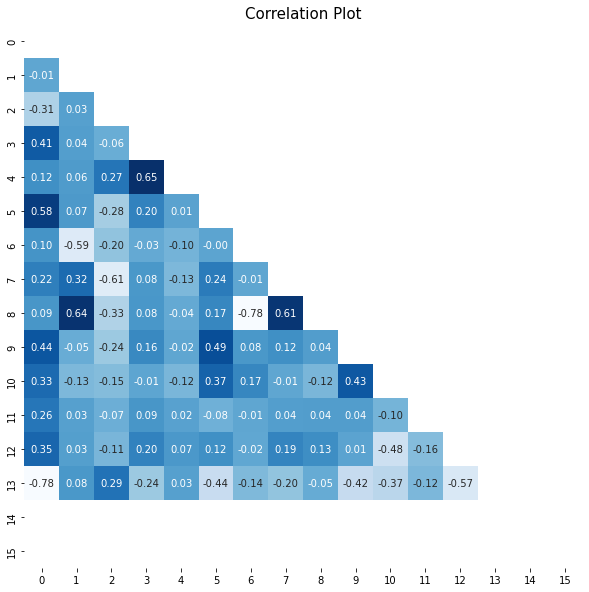

In [71]:
# correlation plot
corr = pd.DataFrame(train_dev_X).corr()

# make mask (only plot lower left triangle)
mask = np.ones_like(corr,dtype = np.bool)
mask = np.triu(mask)

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        mask = mask,
        annot=True, 
        fmt='.2f',
        cmap="Blues",
        cbar=False)

plt.title('Correlation Plot',size=15)
plt.show()
pass

In [72]:
## Split dev and train
n = train_dev_X.shape[0]
shuffle = np.random.permutation(np.arange(n))
X, Y = train_dev_X[shuffle], train_dev_Y[shuffle]

percent_in_dev = .2
dev_slice = int(percent_in_dev * n)

# Set some variables to dev and training data.
dev_dat, dev_lab = X[:dev_slice], Y[:dev_slice]
train_dat, train_lab = X[dev_slice:], Y[dev_slice:]

n_dev = dev_dat.shape[0]
n_train = train_dat.shape[0]
n_feat = train_dat.shape[1]

KNN accuracy with no filtering: 0.7883597883597884 for k = 1


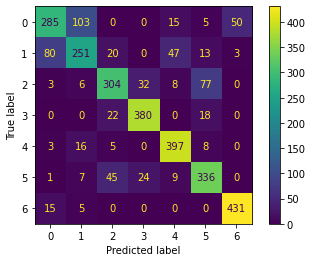

In [73]:
def knn(n_neighbors=1, train_dat=train_dat, train_lab=train_lab, dev_dat=dev_dat, dev_lab=dev_lab):
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn.fit(train_dat, train_lab) #train on processed train data

    pred_knn  = knn.predict(dev_dat) #predict on dev data

    accuracy_count_knn = 0

    for j in range(pred_knn.shape[0]):
        if pred_knn[j] == dev_lab[j]:
            accuracy_count_knn += 1
        else:
            continue

    print(f"KNN accuracy with no filtering: {accuracy_count_knn/pred_knn.shape[0]} for k = {n_neighbors}")

    cm = confusion_matrix(dev_lab, pred_knn)

    ConfusionMatrixDisplay(cm).plot()

    pd.DataFrame(classification_report(dev_lab, pred_knn, output_dict=True))

knn(n_neighbors=1)

In [76]:
train_dat.shape

(12096, 16)

GaussianNB accuracy w/ var smoothing @ .1: 0.5889550264550265
Wall time: 78.2 ms


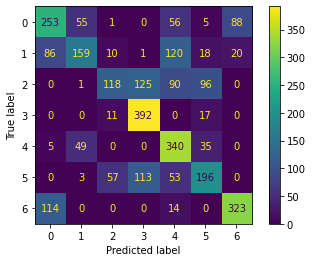

In [74]:
%%time

def gaussian_nb(train_dat=train_dat, train_lab=train_lab, dev_dat=dev_dat, dev_lab=dev_lab):

    ###Train on gaussianNB with var_smoothing = .1###

    model_gnb_s = GaussianNB(var_smoothing=.1)
    model_gnb_s.fit(train_dat,train_lab)

    sigmas2 = model_gnb_s.sigma_
    thetas2 = model_gnb_s.theta_

    ## predict on dev data

    pred_gnb_s = model_gnb_s.predict(dev_dat)
    accuracy_count_gnb_s = 0


    ###generate accuracy
    for j in range(dev_lab.shape[0]):
        if pred_gnb_s[j] == dev_lab[j]:
            accuracy_count_gnb_s += 1
        else:
            continue

    print("GaussianNB accuracy w/ var smoothing @ .1: " + str(accuracy_count_gnb_s/pred_gnb_s.shape[0]))

    cm = confusion_matrix(dev_lab, pred_gnb_s)

    ConfusionMatrixDisplay(cm).plot()

    pd.DataFrame(classification_report(dev_lab, pred_gnb_s, output_dict=True))


    
gaussian_nb()

Train time = 34.34863543510437
Predict time = 1.3255457878112793
Random Forest accuracy: 0.8442460317460317
Wall time: 35.8 s


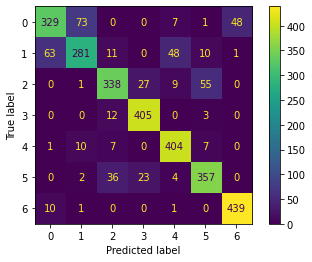

In [78]:
%%time

def randomforest(train_dat=train_dat, train_lab=train_lab, dev_dat=dev_dat, dev_lab=dev_lab):

    rf = RandomForestClassifier(
        n_estimators = 1000,
        criterion="entropy",
        max_depth=15,
        random_state = 42)

    start_time = time.time()
    rf.fit(train_dat, train_lab)
    print(f'Train time = {time.time() - start_time}')

    start_time = time.time()
    rf_pred = rf.predict(dev_dat).astype(int)
    print(f'Predict time = {time.time() - start_time}')

    ###generate accuracy
    accuracy_count_rf = 0
    for j in range(dev_lab.shape[0]):
        if rf_pred[j] == dev_lab[j]:
            accuracy_count_rf += 1
        else:
            continue

    print("Random Forest accuracy: " + str(accuracy_count_rf/rf_pred.shape[0]))

    cm = confusion_matrix(dev_lab, rf_pred)

    ConfusionMatrixDisplay(cm).plot()

    pd.DataFrame(classification_report(dev_lab, rf_pred, output_dict=True))

randomforest()

Train time = 39.41782832145691
Predict time = 1.388214111328125
Random Forest accuracy: 0.8442460317460317


IndexError: index 872 is out of bounds for axis 0 with size 872

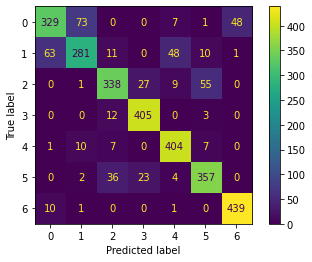

In [98]:
%%time

def randomforest(train_dat=train_dat, train_lab=train_lab, dev_dat=dev_dat, dev_lab=dev_lab):


    
    
randomforest()

Train time = 38.57654356956482
Predict time = 1.1479945182800293
Random Forest accuracy: 0.8442460317460317


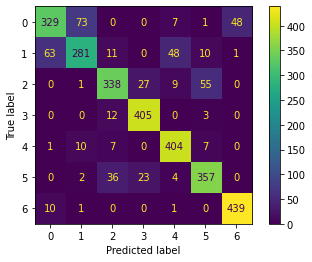

In [99]:

rf = RandomForestClassifier(
    n_estimators = 1000,
    criterion="entropy",
    max_depth=15,
    random_state = 42)

start_time = time.time()
rf.fit(train_dat, train_lab)
print(f'Train time = {time.time() - start_time}')

start_time = time.time()
rf_pred = rf.predict(dev_dat).astype(int)
print(f'Predict time = {time.time() - start_time}')

###generate accuracy
accuracy_count_rf = 0
for j in range(dev_lab.shape[0]):
    if rf_pred[j] == dev_lab[j]:
        accuracy_count_rf += 1
    else:
        continue

print("Random Forest accuracy: " + str(accuracy_count_rf/rf_pred.shape[0]))

cm = confusion_matrix(dev_lab, rf_pred)

ConfusionMatrixDisplay(cm).plot()



Random Forest accuracy: 0.7898832684824902


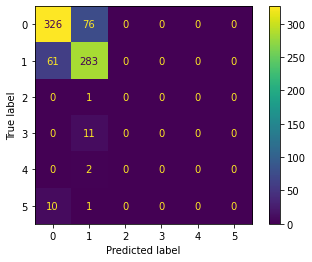

In [101]:

########## just type 1 and 2 ##########
rf = RandomForestClassifier(
    n_estimators = 1000,
    criterion="entropy",
    max_depth=15,
    random_state = 42)

train_data_1_2 = train_dat[(train_lab == 1) | (train_lab == 2)]
train_labels_1_2 = train_lab[(train_lab == 1) | (train_lab == 2)]


dev_data_1_2 = dev_dat[(dev_lab == 1) | (dev_lab == 2)]
dev_labels_1_2 = dev_lab[(rf_pred == 1) | (rf_pred == 2)]

pred_knn_1_2_data = dev_dat[(rf_pred == 1) | (rf_pred == 2)]
pred_knn_1_2_actual_labels = dev_lab[(rf_pred == 1) | (rf_pred == 2)]


rf.fit(train_data_1_2, train_labels_1_2)
rf_pred_1_2 = rf.predict(pred_knn_1_2_data).astype(int)

###generate accuracy
accuracy_count_rf = 0
for j in range(rf_pred_1_2.shape[0]):
    if rf_pred_1_2[j] == pred_knn_1_2_actual_labels[j]:
        accuracy_count_rf += 1
    else:
        continue

print("Random Forest accuracy: " + str(accuracy_count_rf/rf_pred_1_2.shape[0]))

cm = confusion_matrix(pred_knn_1_2_actual_labels, rf_pred_1_2)

ConfusionMatrixDisplay(cm).plot()

In [50]:
# a handy function for vizualizing principle components as a heatmap
# this allows you to see what dimensions in the 'original space' are
# active

def visualize_pca_comps_heatmap(plot, comps, alpha=None):
    heatmap = plot.pcolor(comps, cmap=plt.cm.Blues)
    

    x_lab = [i for i in range(comps.shape[1])]
    y_lab = [i for i in (range(comps.shape[0]))]
    
    plot.set_xticks(np.arange(comps.shape[1])+0.5, minor=False)
    plot.set_yticks(np.arange(comps.shape[0])+0.5, minor=False)
    
    # want a more natural, table-like display
    plot.invert_yaxis()
    
    plot.set_xticklabels(x_lab, minor=False)
    plot.set_yticklabels(y_lab, minor=False)
    
    if alpha is not None:
        plt.title(f'Heatmap of Sparse PCA (alpha {alpha}) components Rows: components, Cols: Original dimensions. ')
    else:
        plt.title('Heatmap of PCA components Rows: components, Cols: Original dimensions')

[[-0.019858787 -0.041911332 -0.087058266 -0.068045688 -0.008244573 -0.044642328  0.          -0.000045752 -0.000459645  0.965774126 -0.023457664 -0.011751831 -0.028800415 -0.008463451  0.          -0.005537589 -0.040868091 -0.002831027 -0.002154453 -0.006845437 -0.00073772  -0.019177616 -0.056678502 -0.013541104 -0.000045752 -0.00253984  -0.000691254 -0.000413467 -0.175621508 -0.052864442 -0.018306306 -0.048911692 -0.041209547 -0.00101753  -0.004922425 -0.000459645 -0.001582422 -0.053220391 -0.045376546 -0.027480086]
 [-0.020323401 -0.051554118 -0.183751105 -0.110490824 -0.007765775 -0.056385886  0.          -0.000040758 -0.000410603  0.116199009 -0.024652113 -0.011346688 -0.031209317 -0.00798405   0.          -0.005119149 -0.050737388 -0.002569387 -0.001946466 -0.006385429 -0.000660226 -0.019564286 -0.080876204 -0.013242104 -0.000040758 -0.002300597 -0.00061845  -0.000369239  0.94903336  -0.072667426 -0.018555862 -0.064699193 -0.050025818 -0.000912341 -0.004531345 -0.000410603 -0.0014

array([0, 0])

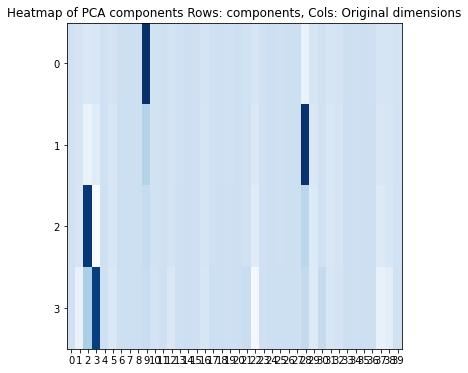

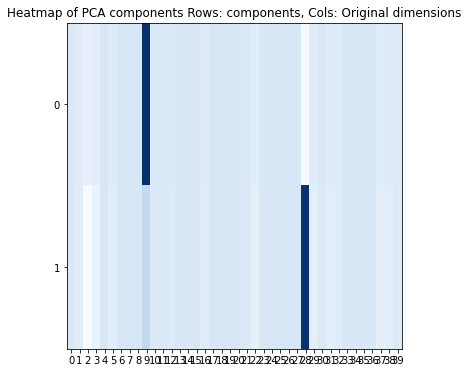

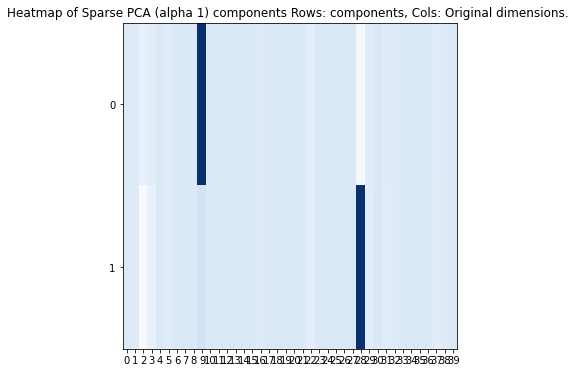

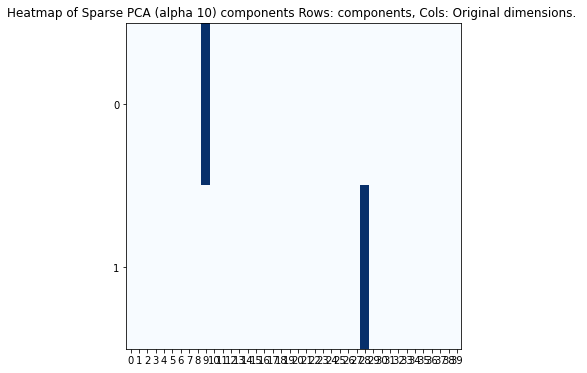

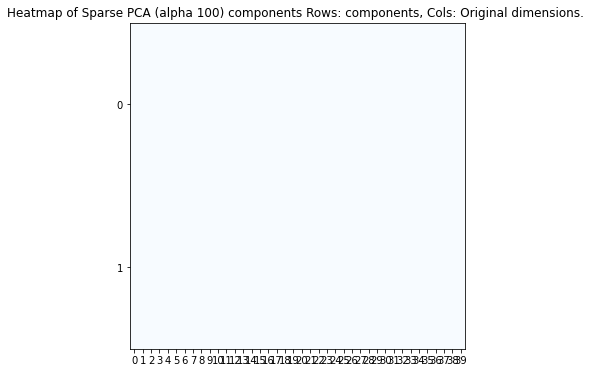

In [59]:
# Pull out the soil area features
X_soil_feat_list = [col for col in train_dev.columns if 'Soil_Type' in col]

train_dev_X_soil = np.array(train_dev[X_soil_feat_list])


plt.figure(figsize=(6, 6))
n_comp = 4
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(train_dev_X_soil)
p1 = plt.subplot(1, 1, 1)
###############
visualize_pca_comps_heatmap(p1, pca_mod.components_)
###############

plt.figure(figsize=(6, 6))
n_comp = 4
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(train_dev_X_soil)

n_comp = 2
pca_mod = PCA(n_components = n_comp)
pca_mod.fit(train_dev_X_soil)

p1 = plt.subplot(1, 1, 1)
###############
visualize_pca_comps_heatmap(p1, pca_mod.components_)
###############

# change alpha and watch as dimensions get dropped
plt.figure(figsize=(6, 6))
alpha_set = 1
spca = SparsePCA(n_components = n_comp, alpha=alpha_set, tol=0.1) # always done now, depreciated #, normalize_components=True)
spca.fit(train_dev_X_soil)

p2 = plt.subplot(1, 1, 1)
###############
visualize_pca_comps_heatmap(p2, spca.components_, alpha_set)
###############

# change alpha and watch as dimensions get dropped
plt.figure(figsize=(6, 6))
alpha_set = 10
spca = SparsePCA(n_components = n_comp, alpha=alpha_set, tol=0.1) # always done now, depreciated #, normalize_components=True)
spca.fit(train_dev_X_soil)

p2 = plt.subplot(1, 1, 1)
###############
visualize_pca_comps_heatmap(p2, spca.components_, alpha_set)
###############

###############
# change alpha and watch as dimensions get dropped
plt.figure(figsize=(6, 6))
alpha_set = 100
spca = SparsePCA(n_components = n_comp, alpha=alpha_set, tol=0.1) # always done now, depreciated #, normalize_components=True)
spca.fit(train_dev_X_soil)

p2 = plt.subplot(1, 1, 1)

visualize_pca_comps_heatmap(p2, spca.components_, alpha_set)
###############




print(pca_mod.components_)
print(spca.components_)
np.sum(spca.components_ != 0 * 1, 1)

In [58]:
def gaussian_nb(train_dat=train_dat, train_lab=train_lab, dev_dat=dev_dat, dev_lab=dev_lab):


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [89]:
def KNNModels(k_values, transformed_train_data=train_dat, train_labels=train_lab, transformed_dev_data=dev_dat, dev_labels=dev_lab):
    print()
    # run k-nearest neighbor model for each k in k_values
    print('KNN Models:')
    best_k = {}
    for k in k_values:
       
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(transformed_train_data, train_labels)
        
        dev_predicted_labels = model.predict(transformed_dev_data)
        # compare the predicted lables to true labels
        f1_score = metrics.f1_score(dev_labels, dev_predicted_labels, average='weighted')
        print(f'''F1 Score for k={k}: {f1_score:3.3f}''')

        best_k[k] = f1_score
    print(f'Best K is: {max(best_k, key=best_k.get)}')
        
        
    return
        
def NaiveBayesModels(alpha_values, transformed_train_data=train_dat, train_labels=train_lab, transformed_dev_data=dev_dat, dev_labels=dev_lab):
    print()
    print('Naive Bayes Models:')
    best_alpha = {}
    for alpha in alpha_values:
        nb_model = MultinomialNB(alpha=alpha)
        nb_model.fit(transformed_train_data, train_labels)
        
        dev_predicted_labels = nb_model.predict(transformed_dev_data)
        f1_score = metrics.f1_score(dev_labels, dev_predicted_labels, average='weighted')
        print(f'''F1 Score for a={alpha}: {f1_score:3.3f}''')
        
        best_alpha[alpha] = f1_score
    print(f'Best alpha is: {max(best_alpha, key=best_alpha.get)}')
        
    return


def LogisticRegressionModels(c_values, transformed_train_data=train_dat, train_labels=train_lab, transformed_dev_data=dev_dat, dev_labels=dev_lab):
    print()
    print('Logistic Regression Models:')
    best_c = {}
    for c in c_values:
        # on larger values of C, the model may fail to converge
        # increase max iterations to help solve this on large values of C
        if c > 100:
            max_iter = 1000
        else:
            max_iter = 100
            
        lr_model = LogisticRegression(C=c, solver="liblinear", multi_class="auto", max_iter=max_iter)
        lr_model.fit(transformed_train_data, train_labels)
        dev_predicted_labels = lr_model.predict(transformed_dev_data)
        
        f1_score = metrics.f1_score(dev_labels, dev_predicted_labels, average='weighted')
        print(f'''F1 Score for C={c}: {f1_score:3.3f}''')
        print(f'Sum of squared weights: {np.sum(lr_model.coef_**2)}')
        
        best_c[c] = f1_score
    print(f'Best C is: {max(best_c, key=best_c.get)}')
        
    return


def Q3():

    
    ### KNN ###
    k_values = list(range(1, 10))
    print('original data:')
    KNNModels(k_values, train_data, train_labels, dev_data, dev_labels)
    print()
    print('preprocessed data:')
    KNNModels(k_values)
    
    
    ### Naive Bayes ###
    alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
#     NaiveBayesModels(alpha_values)
    
    ### Logistic Regression ###
    c_values = [round(c,1) for c in list(np.linspace(0.1,1.1,11))]
    LogisticRegressionModels(c_values)    

Q3()

original data:

KNN Models:
F1 Score for k=1: 0.854
F1 Score for k=2: 0.831
F1 Score for k=3: 0.826
F1 Score for k=4: 0.816
F1 Score for k=5: 0.807
F1 Score for k=6: 0.805
F1 Score for k=7: 0.797
F1 Score for k=8: 0.790
F1 Score for k=9: 0.778
Best K is: 1

preprocessed data:

KNN Models:
F1 Score for k=1: 0.784
F1 Score for k=2: 0.760
F1 Score for k=3: 0.764
F1 Score for k=4: 0.760
F1 Score for k=5: 0.753
F1 Score for k=6: 0.755
F1 Score for k=7: 0.748
F1 Score for k=8: 0.750
F1 Score for k=9: 0.741
Best K is: 1

Logistic Regression Models:
F1 Score for C=0.1: 0.587
Sum of squared weights: 112.21305711515281
F1 Score for C=0.2: 0.594
Sum of squared weights: 155.01120923877141
F1 Score for C=0.3: 0.596
Sum of squared weights: 186.14329681558405
F1 Score for C=0.4: 0.596
Sum of squared weights: 211.41622897902934
F1 Score for C=0.5: 0.599
Sum of squared weights: 232.8306373586709
F1 Score for C=0.6: 0.599
Sum of squared weights: 251.49453575352598
F1 Score for C=0.7: 0.600
Sum of square

In [ ]:
# grid search - pull out lots of things try